#Experiment from internet -- couldn't apply econml methods on cust_churn data -- throws error -- must figure out

In [1]:
#%pip install econml

Note: you may need to restart the kernel to use updated packages.


In [2]:
#%pip install dowhy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Required libraries
import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Avoiding unnecessary log messges and warnings
import logging
logging.getLogger("dowhy").setLevel(logging.WARNING)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True,
    stddev_treatment_noise=10)

d:\LAM_SRM\SCM_DoWhy\DoWhy_EconML\econml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# I. Create a causal model from the data and domain knowledge.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    common_causes=data["common_causes_names"],
    instruments=data["instrument_names"])

In [5]:
print(data)

{'df':        Z0        Z1        W0        W1        W2        W3        W4     v0  \
0     1.0  0.081647 -0.700666  0.818981  0.884658 -2.112662  1.493529  False   
1     1.0  0.057437  1.060246  1.060401 -0.281632  0.645650 -0.946047   True   
2     1.0  0.555864 -1.250038 -0.333358  1.386729  1.307688 -0.655026   True   
3     1.0  0.008238  0.612955  1.361920 -0.855704 -0.308904 -0.180298  False   
4     1.0  0.428626  0.702267  0.938095 -2.041953  0.621826  1.420142   True   
...   ...       ...       ...       ...       ...       ...       ...    ...   
9995  1.0  0.981858  1.131325 -1.225309  0.456179 -0.217266  0.194440   True   
9996  1.0  0.823018 -0.394937  0.052198  0.405672 -0.582099  0.565469   True   
9997  0.0  0.531032  1.268778 -0.537373 -1.577676 -0.560822  1.143542  False   
9998  1.0  0.963523  0.572342 -0.917898  1.831698  0.603390  0.324644   True   
9999  1.0  0.656345 -0.545566 -1.780638 -1.063550  0.885008  0.433508   True   

              y  
0      2.63010

In [6]:
#%pip install graphviz

In [7]:
#%pip install pygraphviz pydot

     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.6 kB ? eta -:--:--
     -------------- ---------------------- 41.0/104.6 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [58 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-311\pygraphviz
      copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-311\pygraphviz
      creating build\lib.win-amd64-cpython-311\pygraphviz\tests
      copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-311\pygraphviz\tests
      copying pygraphviz\tests\test_clear.py -> build\lib.

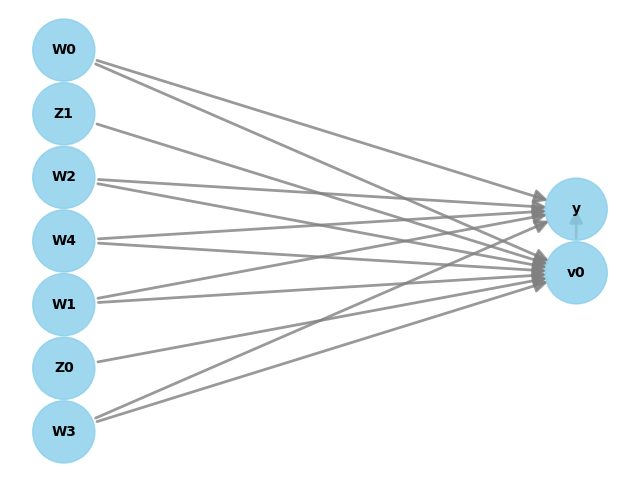

In [8]:
model.view_model() #att-- layout='dot'
from IPython.display import Image, display
#display(Image(filename="causal_model.png"))

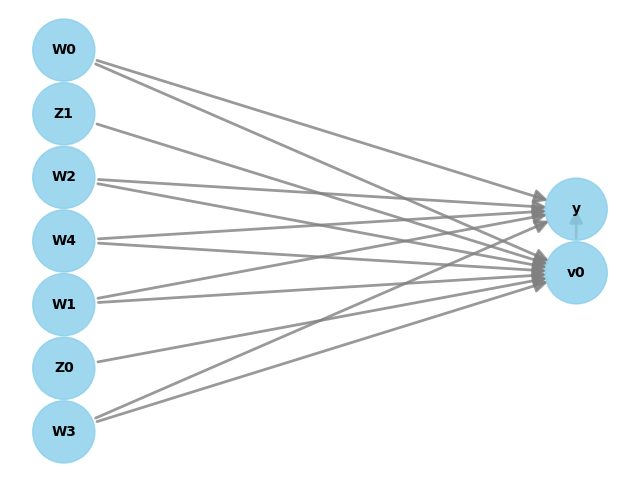

In [9]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"][0],
    outcome=data["outcome_name"][0],
    graph=data["gml_graph"])
model.view_model()

In [10]:
# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W1,W4,W2,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W1,W4,W2,W0,U) = P(y|v0,W3,W1,W4,W2,W0)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁]    ⎝d[Z₀  Z₁]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [11]:
# III. Estimate the target estimand using a statistical method.
propensity_strat_estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.dowhy.propensity_score_stratification")

print(propensity_strat_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W1,W4,W2,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W1,W4,W2,W0,U) = P(y|v0,W3,W1,W4,W2,W0)

## Realized estimand
b: y~v0+W3+W1+W4+W2+W0
Target units: ate

## Estimate
Mean value: 9.948236997962667



In [12]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand,
                                    method_name="backdoor.econml.dml.DML",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W1,W4,W2,W0])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W1,W4,W2,W0,U) = P(y|v0,W3,W1,W4,W2,W0)

## Realized estimand
b: y~v0+W3+W1+W4+W2+W0 | 
Target units: ate

## Estimate
Mean value: 9.958271815823155
Effect estimates: [[9.95827182]]



In [13]:
# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, propensity_strat_estimate,
                                       method_name="placebo_treatment_refuter")
print(refute_results)

Refute: Use a Placebo Treatment
Estimated effect:9.948236997962667
New effect:0.012858056918824414
p value:0.9199999999999999



EconML

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy.datasets, dowhy.plotter

   Treatment    Outcome        w0         s        w1
0   3.737505   6.023950 -3.763635  7.486174  2.743182
1   1.921931   3.983370 -3.999367  7.025168  0.160256
2   5.946279  10.526749 -1.934615  5.562855  2.748592
3   2.800607   5.383615 -3.567784  7.657431  1.031216
4   4.693226   8.536113 -2.197070  8.342732  1.502391


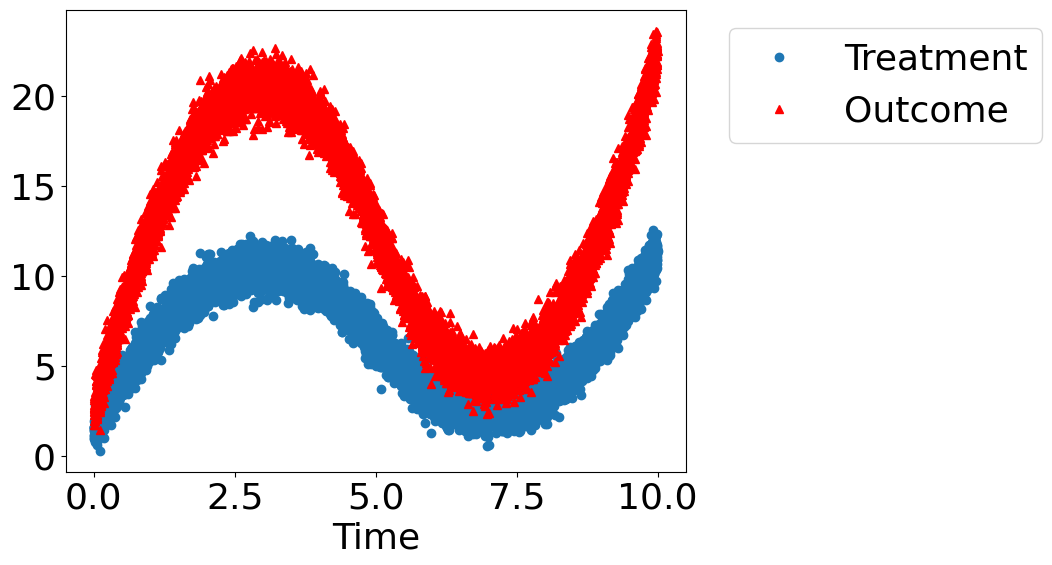

In [15]:
rvar = 1 if np.random.uniform() > 0.2 else 0 # random number between 0 and 1 but greater than 0.2
is_linear = True # A non-linear dataset. Change to True to see results for a linear dataset.
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar,  #xy_dataset from built-in datasets, effect = rvar
                                      num_common_causes=2, # no of common causes in the datasets
                                      is_linear=is_linear,
                                      sd_error=0.2) # standard deviation
df = data_dict['df']
print(df.head())
dowhy.plotter.plot_treatment_outcome(df[data_dict["treatment_name"]], df[data_dict["outcome_name"]],
                             df[data_dict["time_val"]])

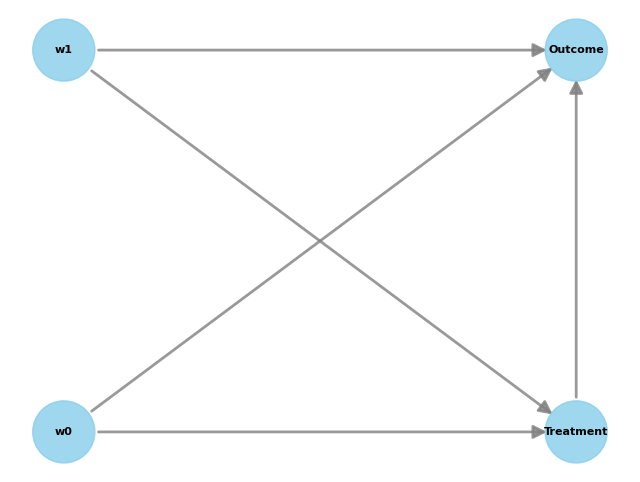

In [16]:
model= CausalModel(
        data=df,
        treatment=data_dict["treatment_name"],
        outcome=data_dict["outcome_name"],
        common_causes=data_dict["common_causes_names"],
        instruments=data_dict["instrument_names"])
model.view_model()

In [17]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w0,w1])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w0,w1,U) = P(Outcome|Treatment,w0,w1)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w0,w1])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w0,w1,U) = P(Outcome|Treatment,w0,w1)

## Realized estimand
b: Outcome~Treatment+w0+w1
Target units: ate

## Estimate
Mean value: 1.0112081240630797

Causal Estimate is 1.0112081240630797


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


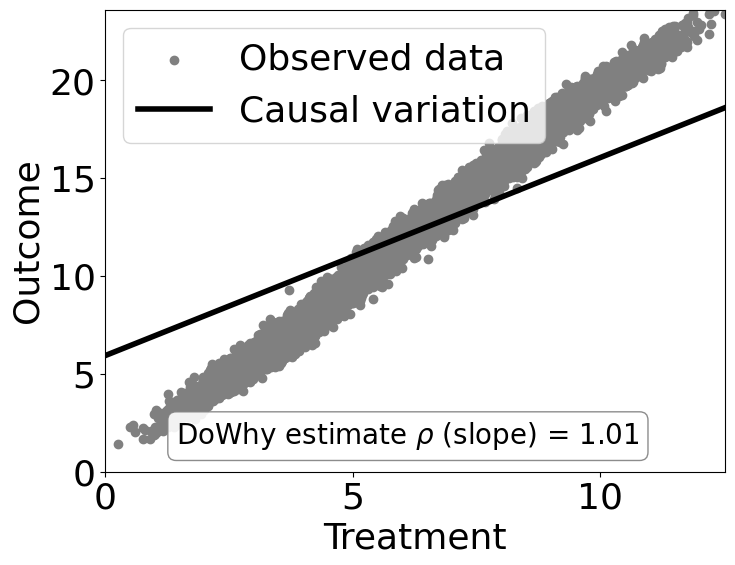

In [18]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between action and outcome = causal effect
dowhy.plotter.plot_causal_effect(estimate, df[data_dict["treatment_name"]], df[data_dict["outcome_name"]])

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False),
                                                              'featurizer':PolynomialFeatures(degree=2, include_bias=True)},
                                               "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w0,w1])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w0,w1,U) = P(Outcome|Treatment,w0,w1)

## Realized estimand
b: Outcome~Treatment+w0+w1 | 
Target units: ate

## Estimate
Mean value: 1.0083713475589349
Effect estimates: [[1.00837135]]



In [20]:
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:1.0083713475589349
New effect:1.0132147900026842
p value:0.43999999999999995



In [21]:
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute",
        num_simulations=20)
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:1.0083713475589349
New effect:2.309671537344247e-05
p value:0.48429268070234893



#Trial with Cust Churn dataset

In [22]:

import pandas as pd
import numpy as np

import numpy as np


customer_ids = ['C' + str(i) for i in range(1, 21)]




# Define the data
data = {
    'Week': ['Week1']*1000 + ['Week2']*1000,
    'Supplier': np.random.choice(['S1', 'S2', 'S3'], 2000),
    'Material': np.random.choice(['Met1', 'Met2', 'Met3'], 2000),
    'No_of_Material': np.random.randint(50, 500, 2000),
    'Machine': np.random.choice(['Mach1', 'Mach1', 'Mach1', 'Mach2', 'Mach2', 'Mach3'], 2000),
    'No_of_Product': np.random.randint(455, 500, 2000), #matching up to no.of Materials
    'Product': np.random.choice(['P1', 'P2', 'P3'], 2000),
    'Customer_id': np.random.choice(customer_ids, 2000)
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a function to assign products to customers
def assign_product(customer_id):
    if customer_id in ['C1', 'C2', 'C3', 'C4', 'C5']:
        return 'P1'
    elif customer_id in ['C6', 'C7', 'C8', 'C9', 'C10']:
        return 'P2'
    else:
        return 'P3'

# Apply the function to the 'Customer_id' column to create the 'Product' column
df['Product'] = df['Customer_id'].apply(assign_product)

# For customers C17, C18, C13, C12 and C19, set 'Product' to 'P3' regardless of 'Extra_Delay'
df.loc[df['Customer_id'].isin(['C17', 'C18', 'C13', 'C12', 'C19']), 'Product'] = 'P3'

# Add Product_Target column
df['Product_Target'] = df['Product'].map({'P1': 0.5*500, 'P2': 0.4*500, 'P3': 0.5*500})

# Add Delivery column
df['Delivery'] = np.where(df['No_of_Product'] >= df['Product_Target'], 'Yes', 'No')

# Add Delayed_Delivery column
df['Delayed_Delivery'] = np.where(df['No_of_Product'] < df['Product_Target'], 'Yes', 'No')


df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach3') & (df['Product'] == 'P3'), 'No_of_Product'] *= 0.6 #changed for P2, P1 & P3-60%


# Ensure the number of products produced is not greater than the number of materials
df['No_of_Product'] = df[['No_of_Material', 'No_of_Product']].min(axis=1)

# Add Delivery Delay Limit column
df['Deli_Delay_Limit'] = df['Product'].map({'P1': 1, 'P2': 2, 'P3': 3})

# Add Extra Delay column
df['Extra_Delay'] =  df['Deli_Delay_Limit'] + 8

# Add Customer_id column
#df['Customer_id'] = 'C' + pd.Series((df.index % 20) + 1).astype(str)

# Reduce the number of P3 products by 50% in the second week
#df.loc[(df['Week'] == 'Week2') & (df['Machine']=='Mach3') & (df['Product'] == 'P3'), 'No_of_Product'] *= 0.5
# Add Customer_Validity column
conditions = [
    (df['Week'] == 'Week1') & (df['Extra_Delay'] >= 10 ),
    (df['Week'] == 'Week2') & (df['Extra_Delay'] > 9),
    (df['Week'] == 'Week1') & (df['Extra_Delay'] <= 11),
    (df['Week'] == 'Week2') & (df['Extra_Delay'] <= 11)
]
choices = ['Not_Existing', 'Not_Existing', 'Existing', 'Existing']
df['Customer_Validity'] = np.select(conditions, choices, default='Not_Existing')


# Print the DataFrame
print(df)


       Week Supplier Material  No_of_Material Machine  No_of_Product Product  \
0     Week1       S2     Met2             370   Mach1          370.0      P3   
1     Week1       S2     Met1             246   Mach2          246.0      P1   
2     Week1       S2     Met3             214   Mach3          214.0      P3   
3     Week1       S2     Met1             194   Mach2          194.0      P3   
4     Week1       S3     Met3             171   Mach1          171.0      P1   
...     ...      ...      ...             ...     ...            ...     ...   
1995  Week2       S3     Met1             281   Mach2          281.0      P2   
1996  Week2       S2     Met2             291   Mach1          291.0      P3   
1997  Week2       S3     Met1              82   Mach3           82.0      P3   
1998  Week2       S3     Met3             364   Mach2          364.0      P3   
1999  Week2       S2     Met2             283   Mach1          283.0      P1   

     Customer_id  Product_Target Delive

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[276.6 295.8 277.8 291.  279.6 274.8 293.4 288.6 282.  294.  297.6 286.2
 274.2 273.  274.8 288.  283.2 274.8 289.8 289.2 296.4 291.6 279.  297.
 294.  298.8 280.2 275.4 298.2 282.6 292.8 289.8 288.  273.6 273.  291.6
 286.2 276.  298.8 292.2 278.4 273.  296.4 275.4 285.6 274.8 278.4 296.4
 288.  299.4 294.  285.6 273.6 289.2 277.8 289.2 274.2 289.2 273.  297.
 295.2 289.2 274.8 286.8 273.6 274.8 292.8 286.2 276.6 274.2 290.4 285.6]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.


In [23]:
#Creating the High_Limit attribute
df['High_Delay'] = df['Extra_Delay'].apply(lambda x: True if x > 9 else False)
#Creating True or False columns from the Attrition flag for the churn column
df['Cust_Churn'] = df['Customer_Validity'].apply(lambda x: True if x == 'Not_Existing' else False)

In [24]:
print(df)

       Week Supplier Material  No_of_Material Machine  No_of_Product Product  \
0     Week1       S2     Met2             370   Mach1          370.0      P3   
1     Week1       S2     Met1             246   Mach2          246.0      P1   
2     Week1       S2     Met3             214   Mach3          214.0      P3   
3     Week1       S2     Met1             194   Mach2          194.0      P3   
4     Week1       S3     Met3             171   Mach1          171.0      P1   
...     ...      ...      ...             ...     ...            ...     ...   
1995  Week2       S3     Met1             281   Mach2          281.0      P2   
1996  Week2       S2     Met2             291   Mach1          291.0      P3   
1997  Week2       S3     Met1              82   Mach3           82.0      P3   
1998  Week2       S3     Met3             364   Mach2          364.0      P3   
1999  Week2       S2     Met2             283   Mach1          283.0      P1   

     Customer_id  Product_Target Delive

In [25]:
#%pip install pandas

In [26]:
#%pip install numpy

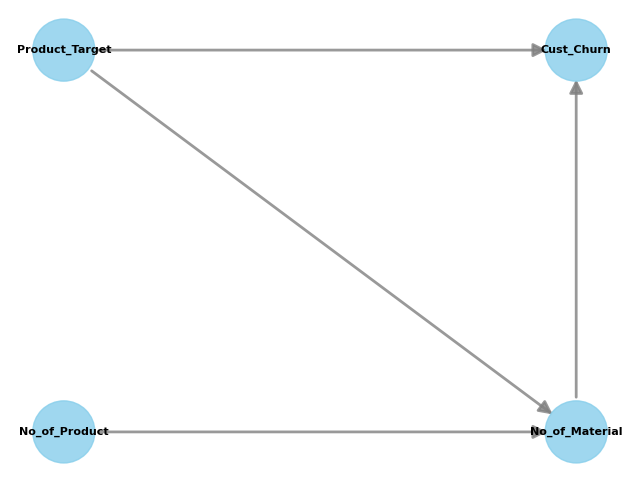

In [27]:
model= CausalModel(
        data=df,
        treatment="No_of_Material",
        outcome="Cust_Churn",
        common_causes="Product_Target",
        instruments="No_of_Product")
model.view_model()

In [28]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                      
─────────────────(E[Cust_Churn|Product_Target])
d[No_of_Material]                              
Estimand assumption 1, Unconfoundedness: If U→{No_of_Material} and U→Cust_Churn then P(Cust_Churn|No_of_Material,Product_Target,U) = P(Cust_Churn|No_of_Material,Product_Target)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                 -1⎤
 ⎢       d                     ⎛       d                          ⎞  ⎥
E⎢────────────────(Cust_Churn)⋅⎜────────────────([No_of_Material])⎟  ⎥
 ⎣d[No_of_Product]             ⎝d[No_of_Product]                  ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Cust_Churn then ¬(U →→{No_of_Product})
Estimand assumption 2, Exclusion: If we remove {No_of_Product}→{No_of_Material}, then ¬({No_of_Product}→Cust_Churn)

### Estimand : 3
Estimand name

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                      
─────────────────(E[Cust_Churn|Product_Target])
d[No_of_Material]                              
Estimand assumption 1, Unconfoundedness: If U→{No_of_Material} and U→Cust_Churn then P(Cust_Churn|No_of_Material,Product_Target,U) = P(Cust_Churn|No_of_Material,Product_Target)

## Realized estimand
b: Cust_Churn~No_of_Material+Product_Target
Target units: ate

## Estimate
Mean value: 4.167449689951308e-05

Causal Estimate is 4.167449689951308e-05


Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


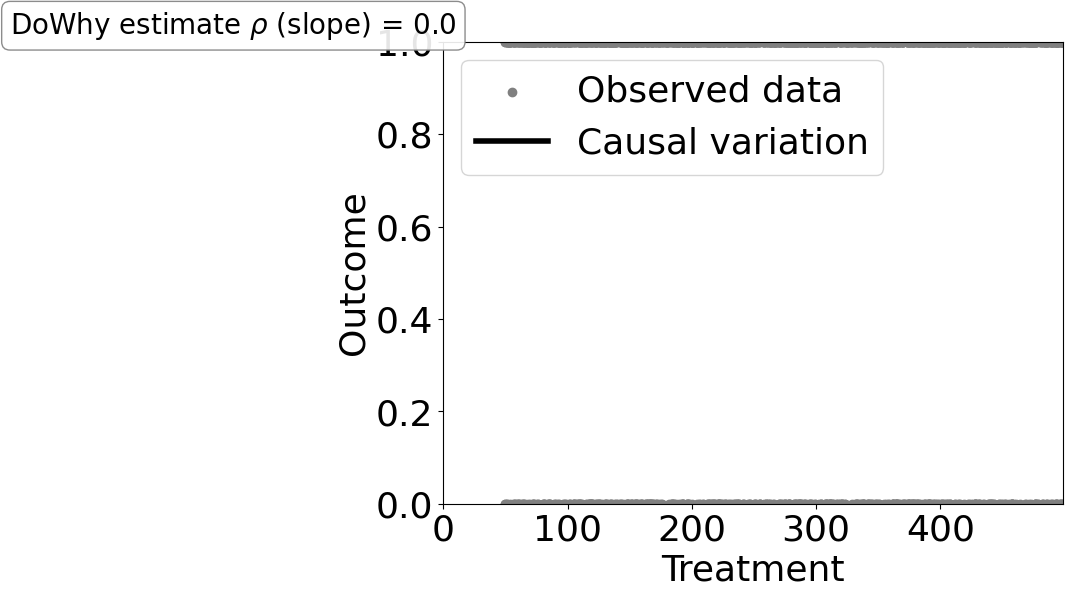

In [29]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between action and outcome = causal effect
dowhy.plotter.plot_causal_effect(estimate, df["No_of_Material"], df["Cust_Churn"])

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False),
                                                              'featurizer':PolynomialFeatures(degree=2, include_bias=True)},
                                               "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                      
─────────────────(E[Cust_Churn|Product_Target])
d[No_of_Material]                              
Estimand assumption 1, Unconfoundedness: If U→{No_of_Material} and U→Cust_Churn then P(Cust_Churn|No_of_Material,Product_Target,U) = P(Cust_Churn|No_of_Material,Product_Target)

## Realized estimand
b: Cust_Churn~No_of_Material+Product_Target | 
Target units: ate

## Estimate
Mean value: 0.0
Effect estimates: [[0.]]



In [31]:
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:0.0
New effect:1.2132997463052167e-05
p value:0.8600000000000001



In [32]:
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute",
        num_simulations=20)
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:0.0
New effect:-3.0511285868512525e-06
p value:0.4713294156593595

